In [8]:
%load_ext autoreload
%autoreload 2

import spikeforest as sf
import spikewidgets as sw
from kbucket import client as kb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
sf.kbucketConfigRemote(share_id='spikeforest.spikeforest1')

In [10]:
R,S=sw.example_datasets.toy_example1()

In [21]:
summary=sf.sf_batch.sf_summarize_recording(dict(
    directory='kbucket://15734439d8cf/testing/M5_2018-03-06_15-34-44',
    channels=[0,1,2,3]
))

::::::::::::::::::::::::::::: ComputeRecordingInfo
EXECUTING::::::::::::::::::::::::::::: ComputeRecordingInfo
::::::::::::::::::::::::::::: CreateTimeseriesPlot
EXECUTING::::::::::::::::::::::::::::: CreateTimeseriesPlot


In [22]:
from PIL import Image

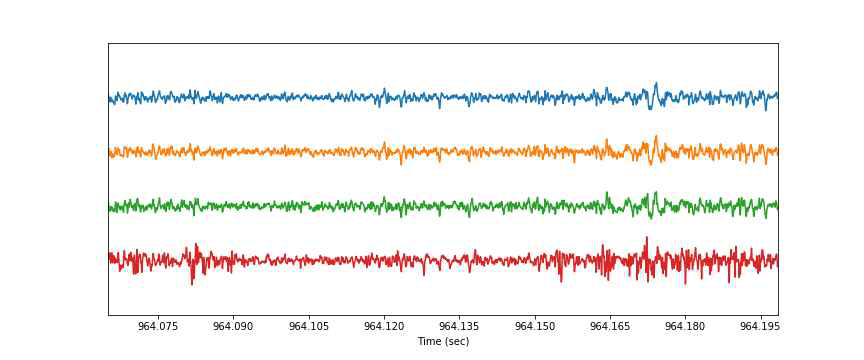

In [24]:
Image.open(kb.realizeFile(summary['plots']['timeseries']))

In [25]:
import spikeinterface as si

In [26]:
R=si.MdaRecordingExtractor(dataset_directory='kbucket://15734439d8cf/testing/M5_2018-03-06_15-34-44')

In [28]:
[R.getChannelProperty(channel_id=ch,property_name='location') for ch in R.getChannelIds()]

[array([0., 0.]),
 array([25., 25.]),
 array([ 0., 25.]),
 array([200., 200.]),
 array([225., 200.]),
 array([225., 225.]),
 array([200., 225.]),
 array([400., 400.]),
 array([425., 400.]),
 array([425., 425.]),
 array([400., 425.]),
 array([600., 600.]),
 array([625., 600.]),
 array([625., 625.]),
 array([600., 625.])]

In [31]:
os.environ['SPIKEFOREST_PASSWORD']='Kc6e'

In [43]:
import os

command='run'
batch_name='testing'

print('Loading batch configs...')
sf.kbucketConfigRemote(share_id='spikeforest.spikeforest1',write=False)
obj=kb.loadObject(key=dict(name='spikeforest_batches'))
if not obj:
  raise Exception('Unable to find spikeforest_batches object.')
batch_configs=obj['batches']
print('Loaded {} configs...'.format(len(batch_configs)))

config=None
for bc in batch_configs:
  if bc['name']==batch_name:
    config=bc
if not config:
  raise Exception('Unable to find batch config with name: '+batch_name)

spikeforest_password=os.environ.get('SPIKEFOREST_PASSWORD','')
if not spikeforest_password:
  raise Exception('Environment variable not set: SPIKEFOREST_PASSWORD')

sf.sf_batch.sf_batch_prepare(config)

command=command
if command=='clear':
  sf.sf_batch.sf_batch_prepare(config,clear_all=True)
elif command=='prepare':
  sf.sf_batch.sf_batch_prepare(config)
elif command=='run':
  sf.sf_batch.sf_batch_run(config)
elif command=='assemble':
  sf.sf_batch.sf_batch_assemble(config)
else:
  raise Exception('Unrecognized command: '+command)

Loading batch configs...
Loaded 4 configs...
Pairio user set to spikeforest. Test succeeded.
PREPARE: testing/M5_2018-03-06_15-34-44-tetrode0
Clearing results for: {}{"name": "sort_recording", "batch_name": "testing", "study_name": "testing", "recording_name": "M5_2018-03-06_15-34-44-tetrode0", "sorter_name": "MountainSort4-thr3", "sorter_params": {"detect_sign": -1, "adjacency_radius": 25, "detect_threshold": 3}}
PREPARE: testing/M5_2018-03-06_15-34-44-tetrode1
PREPARE: testing/M5_2018-03-06_15-34-44-tetrode2
PREPARE: testing/M5_2018-03-06_15-34-44-tetrode3
Pairio user set to spikeforest. Test succeeded.
========= Sorting recording 0/4: MountainSort4-thr3 - testing/M5_2018-03-06_15-34-44-tetrode0
::::::::::::::::::::::::::::: MountainSort4
Found output "firings_out" in cache collection: spikeforest
Using outputs from cache: spikeforest
Already on server.
::::::::::::::::::::::::::::: PlotUnitWaveforms
EXECUTING::::::::::::::::::::::::::::: PlotUnitWaveforms
kbucket://15734439d8cf/test

Exception: test

<Figure size 1087.2x7.2 with 0 Axes>

In [39]:
recording_dir='kbucket://15734439d8cf/testing/M5_2018-03-06_15-34-44'
channels=[0,1,2,3]
firings='/home/magland/kbucket_cache/0/90/0901ec8a1b55195fcc8d4ed35250c1280dbf21d9'
recording=si.MdaRecordingExtractor(dataset_directory=recording_dir)
if len(channels)>0:
    recording=si.SubRecordingExtractor(parent_recording=recording,channel_ids=channels)
sorting=si.MdaSortingExtractor(firings_file=firings)
print(recording.getChannelIds())
sw.UnitWaveformsWidget(recording=recording,sorting=sorting).plot()

[0, 1, 2, 3]


<Figure size 1080x0 with 0 Axes>

In [41]:
sorting.getUnitIds()

array([], dtype=int64)

In [ ]:
R2=si.SubRecordingExtractor(parent_recording=R,channel_ids=[0,1,2,3])

In [3]:
snrs=compute_unit_snrs(recording=R,sorting=S)

In [4]:
snrs

{1: 18.351697292120527,
 2: 7.798728761597641,
 3: 6.577489283617545,
 4: 17.0303049796153,
 5: 6.635162245918483,
 6: 3.954212539055249,
 7: 16.89057764095439,
 8: 9.657336519088958,
 9: 3.7512442570755216,
 10: 15.086091771156745}

In [15]:
sf.sf_batch.sf_summarize_recording(dict(directory='kbucket://15734439d8cf/groundtruth/magland_synth/datasets_noise10_K10_C4/001_synth'))

::::::::::::::::::::::::::::: ComputeRecordingInfo
Found output "json_out" in cache collection: [local]
Using outputs from cache: [local]
::::::::::::::::::::::::::::: CreateTimeseriesPlot
Found output "jpg_out" in cache collection: [local]
Using outputs from cache: [local]
::::::::::::::::::::::::::::: CreateWaveformsPlot
Found output "jpg_out" in cache collection: [local]
Using outputs from cache: [local]
::::::::::::::::::::::::::::: ComputeTrueUnitsInfo
EXECUTING::::::::::::::::::::::::::::: ComputeTrueUnitsInfo


{'directory': 'kbucket://15734439d8cf/groundtruth/magland_synth/datasets_noise10_K10_C4/001_synth',
 'computed_info': {'samplerate': 30000.0,
  'num_channels': 4,
  'duration_sec': 600.0},
 'firings_true': 'kbucket://15734439d8cf/groundtruth/magland_synth/datasets_noise10_K10_C4/001_synth/firings_true.mda',
 'plots': {'timeseries': 'sha1://244149729a175a2737012fa47f1a5c1fd255be86/timeseries.jpg',
  'waveforms_true': 'sha1://883f4148ad033f7c9256bfd7466bd1fda33f691f/waveforms.jpg'},
 'true_units_info': 'sha1://549266dedeb98abff77838600b00683397ffd91c/true_units_info.json'}

In [17]:
from kbucket import client as kb

In [26]:
a=kb.realizeFile('sha1://549266dedeb98abff77838600b00683397ffd91c/true_units_info.json')

In [29]:
%%bash -s "$a"
more $1

::::::::::::::
/home/magland/kbucket_cache/5/49/549266dedeb98abff77838600b00683397ffd91c
::::::::::::::
[{"unit": 1, "num_events": 1398, "firing_rate": 2.33, "snr": 25.502728345247625}, {"unit": 2, "num_events": 1402, "firing_rate": 2.3366666666666664, "snr": 16.7419164365184}, {"unit": 3, "num_events": 1407, "firing_rate": 2.345, "snr": 10.476726542523929}, {"unit": 4, "num_events": 1438, "firing_rate": 2.3966666666666665, "snr": 12.525449378117584}, {"unit": 5, "num_events": 1420, "firing_rate": 2.3666666666666667, "snr": 9.655226068633429}, {"unit": 6, "num_events": 1394, "firing_rate": 2.3233333333333333, "snr": 12.315319124658858}, {"unit": 7, "num_events": 1399, "firing_rate": 2.3316666666666666, "snr": 16.18145310499136}, {"unit": 8, "num_events": 1433, "firing_rate": 2.388333333333333, "snr": 10.078376429509479}, {"unit": 9, "num_events": 1401, "firing_rate": 2.335, "snr": 13.762763070741629}, {"unit": 10, "num_events": 1421, "firing_rate": 2.368333333333333, "snr": 16.97450585